In [54]:
#install the library on your host machine using: pip install bls (in conda if conda is interpreter)
#import libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

In [56]:
#wages = bls.get_series('CIU2020000000000A') #get wagese data
#wages.to_csv('wages_data') #write it to csv file
wages_data = pd.read_csv('wages_data')
wages_data.columns = 'Date', 'Wages'
wages_data.head()

#wages show the annual average growth in %..
#e.g. 2013Q1 1.7% means if the trend continued it would be annul average growth

,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7


In [57]:
#cpi = bls.get_series('CUUR0000SA0') #get cpi data
#cpi.to_csv('cpi_data') #write it to csv
cpi_data = pd.read_csv('cpi_data')
cpi_data.columns = 'Date', 'CPI'
cpi_data.head()

,Date,CPI
0,2013-01,230.280
1,2013-02,232.166
2,2013-03,232.773
3,2013-04,232.531
4,2013-05,232.945


In [58]:
#clean and manipulate data as wages are monthly and cpi quarterly measured
#along with wages shown in percentages, while the cpi is points

cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1') #replace each instance -03 in Date colum with Q1
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')

cpi_data = cpi_data[cpi_data.Date.str.contains('-') == False] #delete other rows containing '-'

cpi_data.head()

,Date,CPI
2,2013Q1,232.773
5,2013Q2,233.504
8,2013Q3,234.149
11,2013Q4,233.049
14,2014Q1,236.293


In [59]:
##wages - divide each quarterly growth rate by four. This would be gross simplification of the process
# taking presumtion that the real changes to wages during those three months were exactly one quarter of the reported year-over-year rate. 
#determine baseline for calculation, that is 1st cpi value from the dataframe

#wagesam = bls.get_series('CIU2020000000000A') #read rata
#wagesam.to_csv('bls_wages_data') #write to csv
df = pd.read_csv('bls_wages_data') #read csv and save to dataframe
df.columns = 'Date','Wages' #rename columns

newdf = df 
newnum = pd.read_csv('cpi_data')
newnum= newnum['CUUR0000SA0'][0] #assign starting CPI as baseline value
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum #convert wages from percentages to points and multiply by baseline to get approximative CPI
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

newwages.head()

,Date,Wages
0,2013Q1,231.258690
1,2013Q2,232.357169
2,2013Q3,233.402776
3,2013Q4,234.628141
4,2014Q1,235.625310


In [122]:
#merge the data
merged_data = pd.merge(cpi_data, newwages, on='Date')
merged_data

,Date,CPI,Wages
0,2013Q1,232.773,231.258690
1,2013Q2,233.504,232.357169
2,2013Q3,234.149,233.402776
3,2013Q4,233.049,234.628141
4,2014Q1,236.293,235.625310
5,2014Q2,238.343,236.744530
6,2014Q3,238.031,238.105811
7,2014Q4,234.812,239.415393
8,2015Q1,236.119,241.091301
9,2015Q2,238.638,242.417303


Text(0.5, 0, 'Dates')

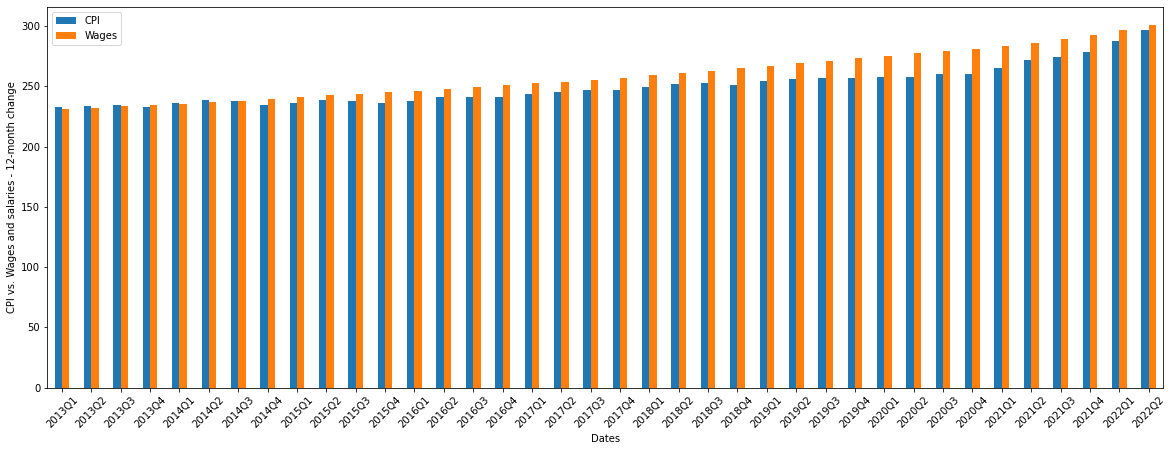

In [61]:
#plot the data
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

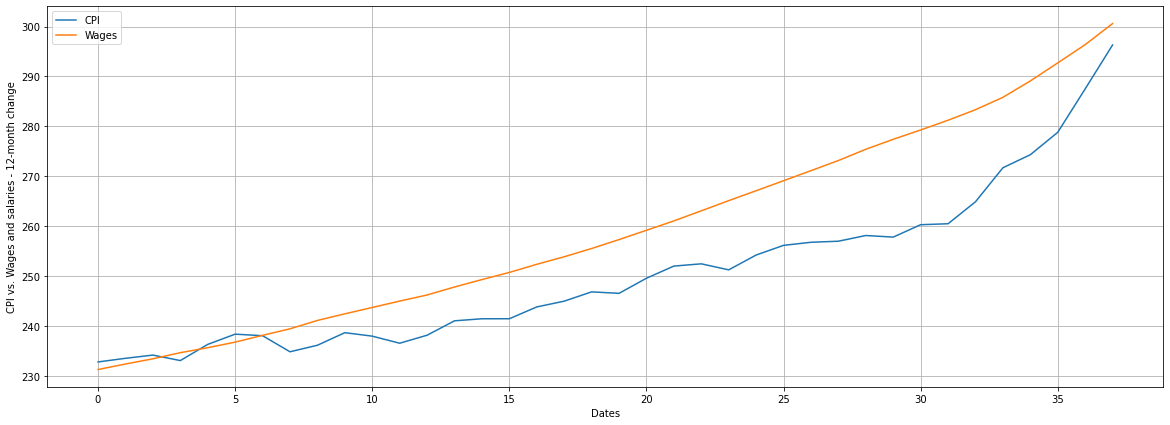

In [62]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()

In [63]:
#alternative plots
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=merged_data['Date'], 
                                y=merged_data['CPI'], 
                                name = 'CPI'
                                ))
fig.add_trace(go.Scatter(x=merged_data['Date'], y=merged_data['Wages'], mode='lines', name='Approximated CPI'))
fig.update_layout(title='Consumer Price Index vs Approximated Consumer Prices Index based on Monthly Wages',
                   xaxis_title='Quarter',
                   yaxis_title='CPI / Approximated CPI')
fig.show()

In [77]:
#Incorporate S&P 500 quotes
import yfinance as yf
#data = yf.Ticker("^GSPC").history(period='10y')
#data.to_csv('new_s_p_500') #write to csv
sp = pd.read_csv('new_s_p_500')
sp.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-08-17,1415.839966,1418.709961,1414.670044,1418.160034,2922990000,0,0
1,2012-08-20,1417.849976,1418.130005,1412.119995,1418.130005,2766320000,0,0
2,2012-08-21,1418.130005,1426.680054,1410.859985,1413.170044,3282950000,0,0
3,2012-08-22,1413.089966,1416.119995,1406.780029,1413.489990,3062690000,0,0
4,2012-08-23,1413.489990,1413.489990,1400.500000,1402.079956,3008240000,0,0


In [78]:
#set Date column to use the datetime64 format. 
#use strftime to organize the dates so the year comes first, followed by month and day
#set the dash character - as the delimiter.

#sp['Date'] = sp['Date'].astype('datetime64[ns]')
#sp['Date'] = sp['Date'].dt.strftime('%Y-%m-%d')

In [124]:
sp = sp[sp.Date.str.contains('2012-') == False] #delete rows with 2012

sp

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
279,2013Q3,1687.260010,1687.260010,1674.989990,1681.550049,3308630000,0,0
343,2013Q4,1842.609985,1849.439941,1842.410034,1848.359985,2312840000,0,0
467,2014Q2,1960.790039,1964.239990,1958.219971,1960.229980,3037350000,0,0
531,2014Q3,1978.209961,1985.170044,1968.959961,1972.290039,3951100000,0,0
595,2014Q4,2082.110107,2085.580078,2057.939941,2058.899902,2606070000,0,0
655,2015Q1,2064.110107,2088.969971,2064.110107,2086.239990,2917690000,0,0
719,2015Q2,2061.189941,2074.280029,2056.320068,2063.110107,4078540000,0,0
783,2015Q3,1887.140015,1920.530029,1887.140015,1920.030029,4525070000,0,0
847,2015Q4,2060.590088,2062.540039,2043.619995,2043.939941,2655330000,0,0
907,2016Q1,2058.270020,2072.209961,2058.270020,2063.949951,3590310000,0,0


In [82]:
sp['Date'] = sp['Date'].str.replace('-03-30', 'Q1')
sp['Date'] = sp['Date'].str.replace('-06-30', 'Q2')
sp['Date'] = sp['Date'].str.replace('-09-30', 'Q3')
sp['Date'] = sp['Date'].str.replace('-12-31', 'Q4')

sp = sp[(sp.Date.str.contains("Q") == True)] #delete rows without 'Q'

In [83]:
sp1 = sp[['Date', 'Close']]
sp1.head()

,Date,Close
279,2013Q3,1681.550049
343,2013Q4,1848.359985
467,2014Q2,1960.229980
531,2014Q3,1972.290039
595,2014Q4,2058.899902


In [86]:
#new dataframe made up of each of our three existing sets
from functools import reduce
dfs = [cpi_data, newwages, sp1]

df_triple = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

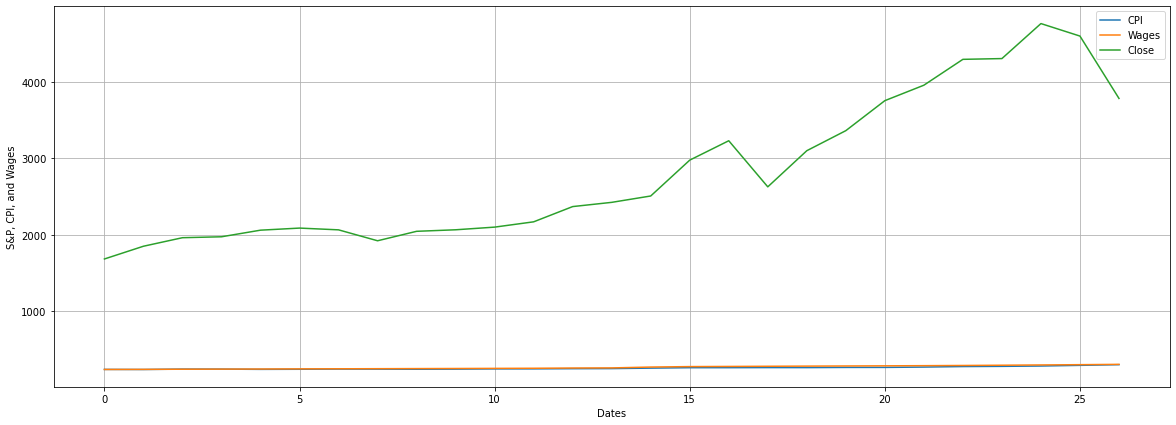

In [87]:
ax = df_triple.plot(kind='line', figsize=(20, 7))
ax.set_ylabel('S&P, CPI, and Wages')
ax.set_xlabel('Dates')
ax.grid()

Text(0.5, 0, 'Dates')

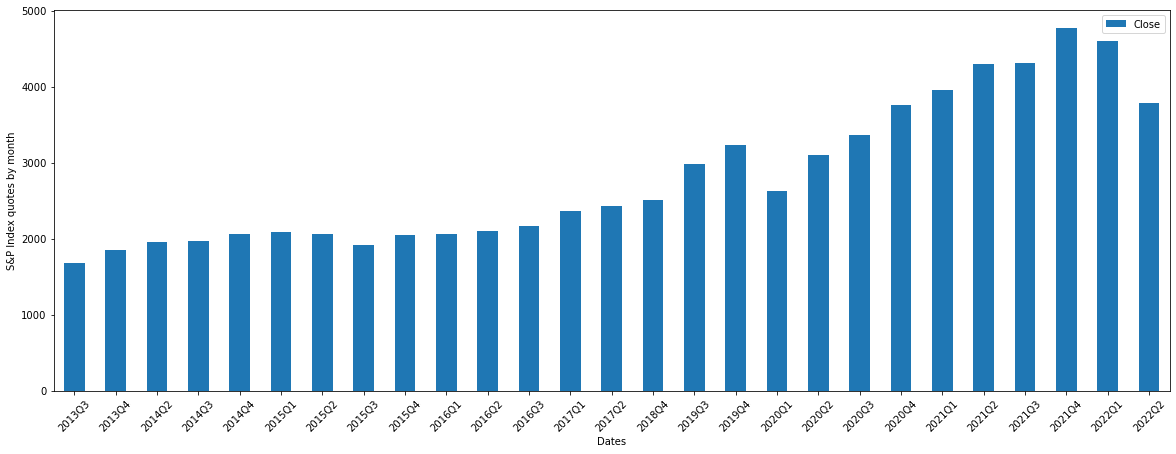

In [88]:
ax = sp1.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(sp1.Date, rotation=45)
ax.set_ylabel('S&P Index quotes by month')
ax.set_xlabel('Dates')

C:\Users\User\AppData\Local\Temp/ipykernel_13728/2525259433.py:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 0, 'Dates')

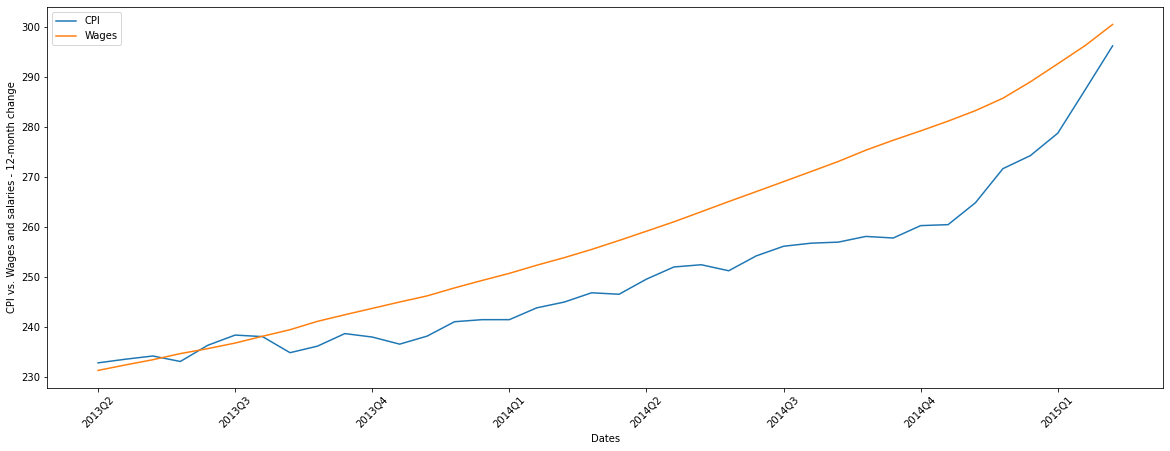

In [89]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

In [115]:
#alternative plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(x=merged_data['Date'], 
                                y=merged_data['CPI'], 
                                name = 'CPI'), row=1, col=1)

fig.add_trace(go.Scatter(x=merged_data['Date'], 
                         y=merged_data['Wages'], 
                         mode='lines', 
                         name='Approximated CPI'), row=1, col=1)

fig.append_trace(go.Scatter(x=sp1['Date'], 
                            y=sp1['Close'], 
                            mode='lines', 
                            name='S&P500'), row=2, col=1)

fig.update_layout(title='Consumer Price Index vs Wages vs S&P500', 
                  xaxis_title='Quarter', 
                  yaxis_title='CPI / Approximated CPI (Wages) / S&P500')
fig.show()


In [129]:
#Calculate rate of increase for both CPI and S&P (CAGR - Compound Annual Growth Rate)

#first = 1681.550049 #first price
#last = 3785.379883  #last price
first = sp1['Close'].iat[0]
last = sp1['Close'].iat[-1]
periods = 10
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('The S&P had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

#The S&P had a CAGR of 8.45% 

The S&P had a CAGR of 8.45% 


In [128]:
#first = 232.773 #first value
#last = 296.311  #last value
first = merged_data['CPI'].iat[0]
last = merged_data['CPI'].iat[-1] 
periods = 10
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('The Consumer Price Index had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

#The Consumer Price Index had a CAGR of 2.44%

The Consumer Price Index had a CAGR of 2.44% 


In [130]:
#first = 178.64
#last = 281.31
first = merged_data['Wages'].iat[0]
last = merged_data['Wages'].iat[-1]
periods = 20
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('Wages had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

#Wages had a CAGR of 1.32% 

Wages had a CAGR of 1.32% 


So our consumer price index growth rate over the past 10 years was 2.449% and the employment wages rate was 1.32%. While, over the same time, the S&P 500 market index increased at an average annual rate of 8.45%!